# Regularization

### L1과 L2의 특징

In [1]:
import matplotlib.pyplot as plt
import numpy as np

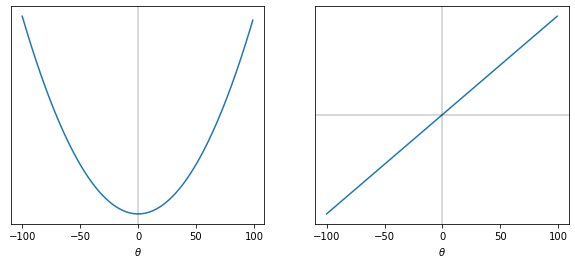

In [2]:
x = np.arange(-100,100)

y1 = x**2
y2 = 2*x

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x, y1)
plt.yticks([])
plt.xlabel(r'$\theta$')
plt.axvline(x=0, lw=0.3, c ='black')

plt.subplot(1,2,2)
plt.plot(x,y2)
plt.yticks([])
plt.xlabel(r'$\theta$')
plt.axvline(x=0, lw=0.3, c ='black')
plt.axhline(y=0, lw=0.3, c ='black')

plt.savefig('L2.png')

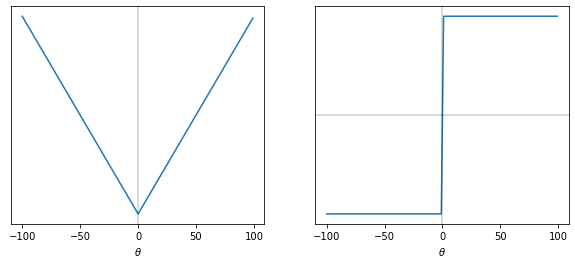

In [3]:
x = np.arange(-100,100)

y1 = abs(x)
y2 = np.sign(x)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x, y1)
plt.yticks([])
plt.xlabel(r'$\theta$')
plt.axvline(x=0, lw=0.3, c ='black')

plt.subplot(1,2,2)
plt.plot(x,y2)
plt.yticks([])
plt.xlabel(r'$\theta$')
plt.axvline(x=0, lw=0.3, c ='black')
plt.axhline(y=0, lw=0.3, c ='black')

plt.savefig('L1.png')

### Regularization 사용하기

### L2 Regularization

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

class mymodel(nn.Module):
    
    def __init__(self):
        super(mymodel, self).__init__()
        self.fc1 = nn.Linear(10,10)
        self.fc2 = nn.Linear(10,2)
        
    def forward(self, x):
        
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

model = mymodel()

optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0.001
)

### L1 Regularization
- Pytorch에서 제공하지 않기 때문에 따로 구현을 해야한다.
- L1 Loss를 따로 구현한 후에 학습 과정에서 Loss를 합쳐주면 된다.

In [5]:
L1_loss = 0
for param in model.parameters():
    L1_loss = L1_loss + torch.sum(abs(param))
    
print(L1_loss)

tensor(22.1328, grad_fn=<AddBackward0>)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

model = mymodel()

optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_func = nn.MSELoss()


EPOCH = 10

for e in range(1, EPOCH+1):
    model.train()
    running_loss = 0
    
    for i, data in enumerate(trainloader):
        images, labels = data
        
        optimizer.zero_grad()
        outputs = model(images)
        
        MSE_Loss = loss_func(outputs, labels) # MSE loss
        
        L1_Loss = 0
        for param in model.parameters():
            L1_loss += torch.sum(abs(param))
            
        Loss = MSE_Loss + a * L1_Loss 
        
        Loss.backward()
        optimizer.step()
        
        running_loss += Loss
        now = time.time()
        print('\r[%d/%d]-----[%d/%d] LOSS : %.3f' %(e, EPOCH, i, 60000/128), end = '')
        
    print('\n')

### 실험
- LeNet-5의 [코드](https://github.com/gjustin40/Pytorch-Cookbook/tree/master/Advanced/LeNet)를 참고했다.
- train 메소드를 구현해서 L1과 L2를 선택할 수 있도록 구현했다.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.Resize((32,32)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5], std=[0.5])])

train_dataset = datasets.MNIST(root='../../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='../../data', train=False, download=True, transform=transform)

train_dataset, val_dataset = random_split(train_dataset, (55000, 5000))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [7]:
def show_image(x, y, y_pred=None):
    
    x = x[:9, 0, ...]
    y = y[:9]
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        
        ax.imshow(x[i], cmap='gray')
        
        if y_pred is None:
            xlabel = "True: {}".format(y[i])
        else:
            xlabel = "True: {}, Pred: {}".format(y[i], y_pred[i])
            
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

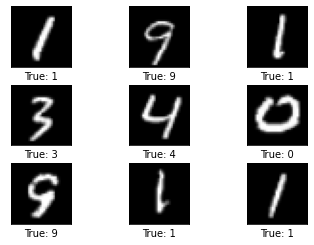

In [8]:
images, labels = iter(train_loader).next()
show_image(images, labels)

In [9]:
class Lenet5(nn.Module):
    
    def __init__(self):
        super(Lenet5, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.avgpool = nn.AvgPool2d(2,2)
        
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
       
        x = torch.tanh(self.conv1(x))
        x = self.avgpool(x)
        
        x = torch.tanh(self.conv2(x))
        x = self.avgpool(x)
        
        x = x.view(-1, 16*5*5)
        
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        
        return x
                

In [10]:
model = Lenet5()
model

Lenet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [11]:
loss_func = nn.CrossEntropyLoss()

In [12]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


In [13]:
def train(epoch, reg, a=0):
    
    if reg == 'L2':
        optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=a)
    else:
        optimizer = optim.SGD(model.parameters(), lr=0.001)
    
    EPOCH = epoch
    train_loss_list, val_loss_list = [], []

    for e in range(EPOCH):

        train_loss = 0
        train_correct = 0

        model.to(device)
        model.train()

        for i, data in enumerate(train_loader):
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
        
            output = model(images)
            CEE_Loss = loss_func(output, labels)
            
            if reg == 'L1':
                
                L1_Loss = 0
                for param in model.parameters():
                    L1_Loss += torch.sum(abs(param))
                    loss = CEE_Loss + L1_Loss * a
                    
            else:
                loss = CEE_Loss
                
            loss.backward()
            optimizer.step()

            train_loss += loss.cpu().item()

            pred = output.argmax(1)
            train_correct += (pred == labels).cpu().sum().item()

        train_acc = train_correct / len(train_dataset)
        train_loss = train_loss / len(train_dataset)
        train_loss_list.append(train_loss)

        val_loss = 0
        val_correct = 0

        model.eval()

        with torch.no_grad():
            for i, data in enumerate(val_loader):
                images, labels = data
                images, labels = images.to(device), labels.to(device)

                output = model(images)

                loss = loss_func(output, labels)

                val_loss += loss.cpu().item()

                val_pred = output.argmax(1)
                val_correct += (val_pred == labels).cpu().sum().item()

            val_acc = val_correct / len(val_dataset)
            val_loss = val_loss / len(val_dataset)
            val_loss_list.append(val_loss)

        info = '[EPOCH {}/{}] : train-loss = {:0.4f} | train-acc = {:0.4f} | val-loss = {:0.4f} | val-acc = {:0.4f} | Regularization = {}'
        print(info.format(e+1, EPOCH, train_loss, train_acc, val_loss, val_acc, reg))

In [14]:
train(epoch=3, reg='L1', a=0.001)

[EPOCH 1/3] : train-loss = 0.2458 | train-acc = 0.3133 | val-loss = 0.1258 | val-acc = 0.5742 | Regularization = L1
[EPOCH 2/3] : train-loss = 0.2091 | train-acc = 0.6950 | val-loss = 0.1008 | val-acc = 0.7612 | Regularization = L1
[EPOCH 3/3] : train-loss = 0.1846 | train-acc = 0.7835 | val-loss = 0.0898 | val-acc = 0.8024 | Regularization = L1


In [15]:
train(epoch=3, reg='L2', a=0.001)

[EPOCH 1/3] : train-loss = 0.0850 | train-acc = 0.8056 | val-loss = 0.0809 | val-acc = 0.8166 | Regularization = L2
[EPOCH 2/3] : train-loss = 0.0784 | train-acc = 0.8151 | val-loss = 0.0761 | val-acc = 0.8244 | Regularization = L2
[EPOCH 3/3] : train-loss = 0.0746 | train-acc = 0.8201 | val-loss = 0.0730 | val-acc = 0.8250 | Regularization = L2
